In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pyod.models.knn import KNN

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
bank = pd.read_csv("bank-additional-full.csv", sep=';')
df = pd.read_csv("bank-additional-full.csv", sep=';')

In [5]:
# pdays are binned into "Not Contacted" and "Contacted"
bin_labels = ["Contacted", "Not Contacted"]
#df['pdays'] = pd.cut(bank['pdays'], bins=2, labels=bin_labels)

# variable "y" is renamed to "deposit"
df.rename(columns={'y':'deposit'}, inplace=True)
df.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [6]:
pd.cut(bank['pdays'], bins=2, labels=bin_labels).value_counts()

Not Contacted    39673
Contacted         1515
Name: pdays, dtype: int64

In [61]:
# can skip this step
# y column
# Binary Encoding deposit values are changed to 0 and 

df['deposit'] = np.where(df.deposit == 'yes', 1, 0)
df['deposit']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: deposit, Length: 41188, dtype: int32

In [7]:
# Recoding job values
df['job'].replace({'entrepreneur': 'self-employed', 'technician': 'blue-collar',
                   'admin.': 'white-collar', 'management': 'white-collar',
                  'services': 'pink-collar', 'housemaid': 'pink-collar'}, inplace=True)
df.job.value_counts().to_frame()

,job
blue-collar,15997
white-collar,13346
pink-collar,5029
self-employed,2877
retired,1720
unemployed,1014
student,875
unknown,330


In [8]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

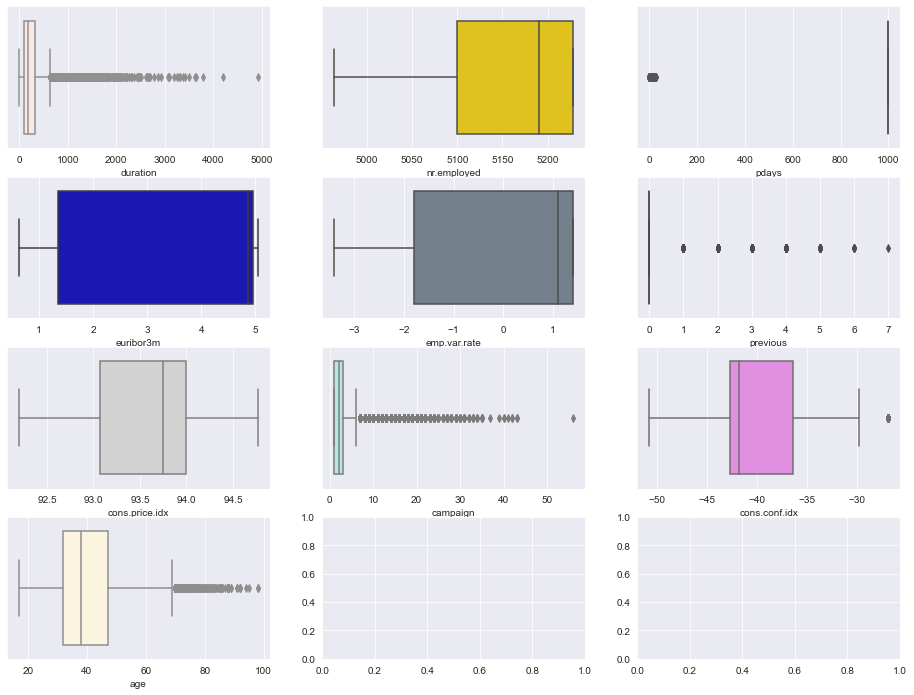

In [64]:
import random
from matplotlib.colors import cnames
corr = df.corr()['deposit'].abs().sort_values(ascending=False)
h_corr_cols = corr[corr < 1].index.tolist()
colors = list(cnames.keys())
sns.set_style('darkgrid')
fig , ax = plt.subplots(4,3,figsize = (16,12))
ax = ax.ravel()
for i,col in enumerate(h_corr_cols):
    sns.boxplot(df[col], ax = ax[i],color = random.choice(colors))

In [63]:
x = df[h_corr_cols].values
model = KNN(contamination=.1)
model.fit(x)
predicted = model.predict(x)

outliers = df.loc[(predicted == 1),:]
inliers = df.loc[(predicted == 0),:]

In [67]:
df = df.drop(index = df.loc[(predicted == 1),:].index )

In [68]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()

# Standardscaler
It improves model accuracy according to literature

In [5]:
# categorical columns
# OneHotEncoding to create dummies
#cat_cols = df.select_dtypes(include=[
#        'object']).columns
#df = pd.get_dummies(df, columns=cat_cols)
#standard Scaler for Numerical Variables
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols]


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [36]:
# write to csv
df.to_csv('features.csv', index=False)

# Unused Skew transformations

In [4]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
bank[num_cols].skew()


age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [51]:
bank[num_cols].skew()
df_skew = np.sqrt(df[num_cols])
df_skew.skew()
df_skew2 = np.log(df[num_cols])
df_skew2.skew()


age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

Note: you may need to restart the kernel to use updated packages.
